In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("tictactoe.data.csv")

In [61]:
df.head()

,1,2,3,4,5,6,7,8,9,Result
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

In [64]:
for i in df.columns:
    df[i] = le.fit_transform(df[i])
print(i)

Result


In [66]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head()

,1,2,3,4,5,6,7,8,9
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [69]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD,Adam

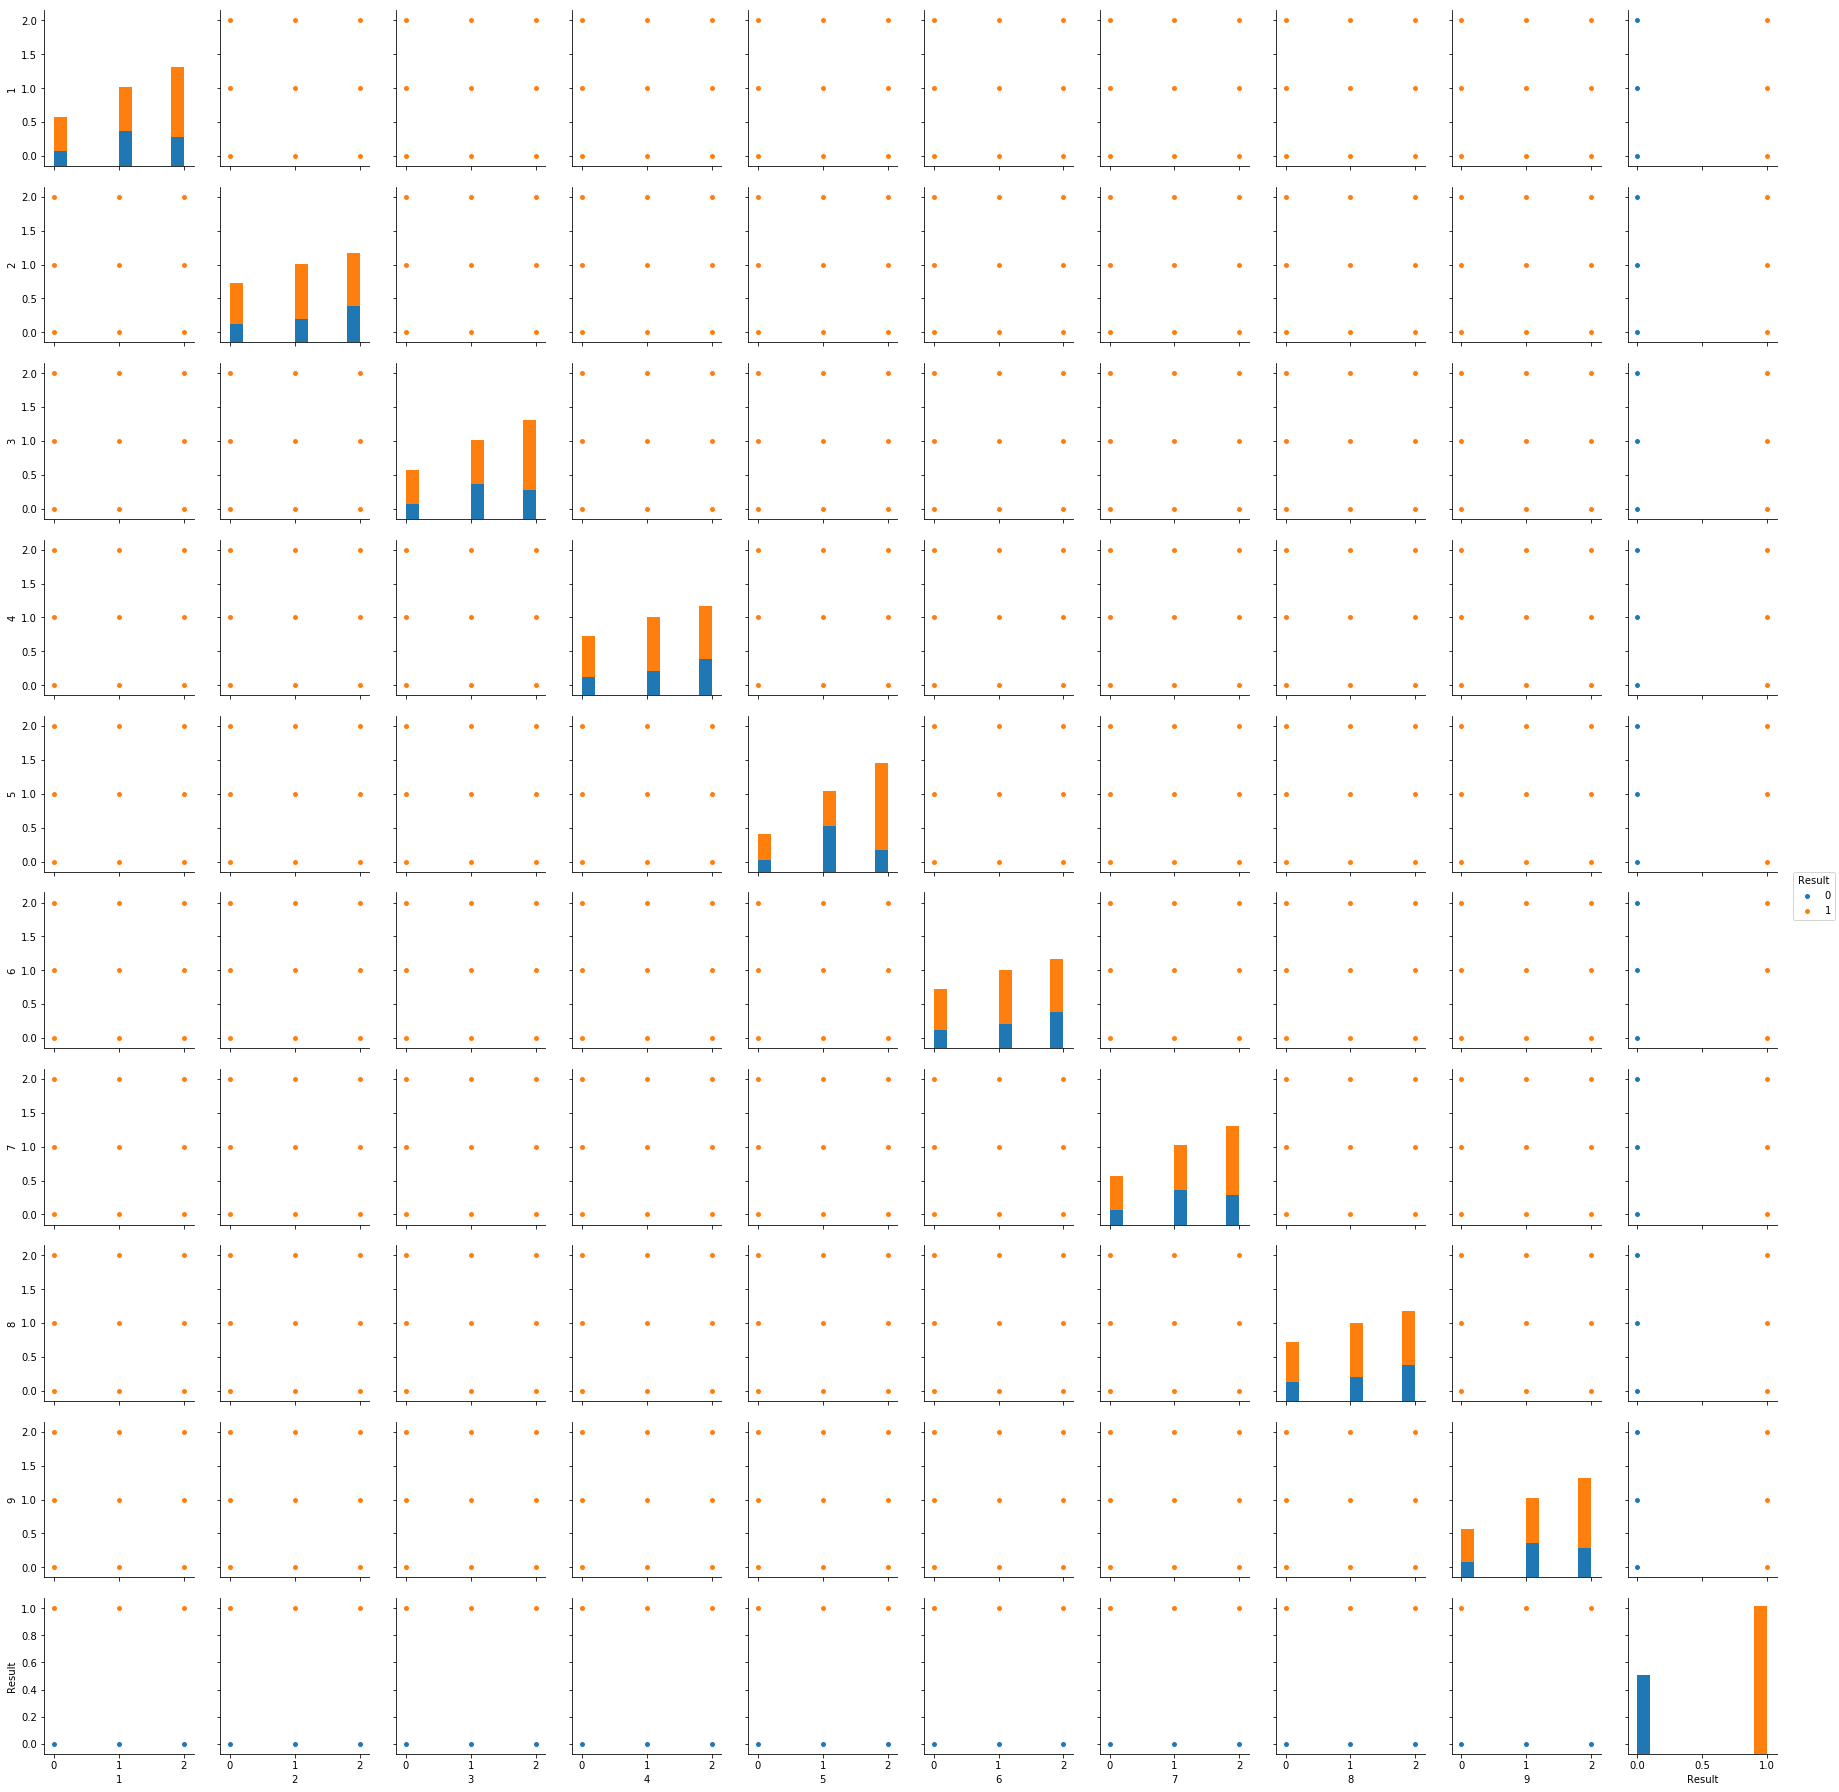

In [70]:
import seaborn as sns
sns.pairplot(df,hue='Result')

In [71]:
df['Result'].value_counts()

1    626
0    332
Name: Result, dtype: int64

In [72]:
model = Sequential()
model.add(Dense(1,input_shape=(9,),activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [73]:
history = model.fit(x_train,y_train,epochs = 100)
res = model.evaluate(x_test,y_test)

Epoch 1/100
670/670 [==============================] - 2s 2ms/step - loss: 0.8340 - acc: 0.4701
Epoch 2/100
670/670 [==============================] - 0s 55us/step - loss: 0.7947 - acc: 0.4985
Epoch 3/100
670/670 [==============================] - 0s 108us/step - loss: 0.7781 - acc: 0.5254
Epoch 4/100
670/670 [==============================] - 0s 60us/step - loss: 0.7670 - acc: 0.5299
Epoch 5/100
670/670 [==============================] - 0s 64us/step - loss: 0.7585 - acc: 0.5358
Epoch 6/100
670/670 [==============================] - 0s 58us/step - loss: 0.7509 - acc: 0.5463
Epoch 7/100
670/670 [==============================] - 0s 69us/step - loss: 0.7438 - acc: 0.5478
Epoch 8/100
670/670 [==============================] - 0s 66us/step - loss: 0.7369 - acc: 0.5478
Epoch 9/100
670/670 [==============================] - 0s 61us/step - loss: 0.7304 - acc: 0.5552
Epoch 10/100
670/670 [==============================] - 0s 67us/step - loss: 0.7241 - acc: 0.5567
Epoch 11/100
670/670 [=======

670/670 [==============================] - 0s 58us/step - loss: 0.6144 - acc: 0.6821
Epoch 85/100
670/670 [==============================] - 0s 58us/step - loss: 0.6144 - acc: 0.6776
Epoch 86/100
670/670 [==============================] - 0s 60us/step - loss: 0.6142 - acc: 0.6806
Epoch 87/100
670/670 [==============================] - 0s 51us/step - loss: 0.6144 - acc: 0.6836
Epoch 88/100
670/670 [==============================] - 0s 52us/step - loss: 0.6142 - acc: 0.6806
Epoch 89/100
670/670 [==============================] - 0s 64us/step - loss: 0.6141 - acc: 0.6821
Epoch 90/100
670/670 [==============================] - 0s 63us/step - loss: 0.6140 - acc: 0.6806
Epoch 91/100
670/670 [==============================] - 0s 69us/step - loss: 0.6137 - acc: 0.6806
Epoch 92/100
670/670 [==============================] - 0s 67us/step - loss: 0.6138 - acc: 0.6821
Epoch 93/100
670/670 [==============================] - 0s 61us/step - loss: 0.6140 - acc: 0.6806
Epoch 94/100
670/670 [===========

In [82]:
his = pd.DataFrame(history.history)

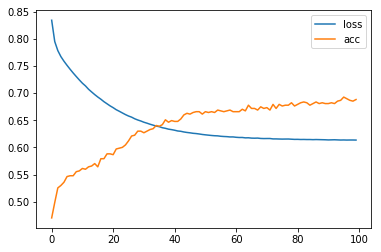

In [83]:
his.plot()